In [93]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [94]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [95]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(count=3,
                         label="3y",
                         step="year",
                         stepmode="backward"),
                    dict(count=5,
                         label="5y",
                         step="year",
                         stepmode="backward"),
                    dict(count=10,
                         label="10y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Indice de producción"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos

In [ ]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2000-01-01', end='2020-01-02')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(5031, 6)


Open      High      Low    Close  Adj Close  Volume
Date                                                              
2000-01-03  22.0000  22.09375  21.6875  21.9375  15.344908  286700
2000-01-04  21.9375  22.12500  20.8750  20.9375  14.645433  338700
2000-01-05  20.6875  21.62500  20.6875  21.0625  14.732862  214000
2000-01-06  21.1250  21.31250  20.8750  21.2500  14.864018  232700
2000-01-07  21.2500  21.62500  20.9375  21.3750  14.951461  207800

In [ ]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

Date    Close
0 2000-01-03  21.9375
1 2000-01-04  20.9375
2 2000-01-05  21.0625
3 2000-01-06  21.2500
4 2000-01-07  21.3750
5 2000-01-10  21.4375
6 2000-01-11  21.4375
7 2000-01-12  21.3750
8 2000-01-13  21.5625
9 2000-01-14  21.3125

(5031, 2)

Close
Date               
2000-01-03  21.9375
2000-01-04  20.9375
2000-01-05  21.0625
2000-01-06  21.2500
2000-01-07  21.3750
2000-01-08  21.3750
2000-01-09  21.3750
2000-01-10  21.4375
2000-01-11  21.4375
2000-01-12  21.3750

(7303, 1)

In [ ]:
%R -i df

In [ ]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4


In [ ]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

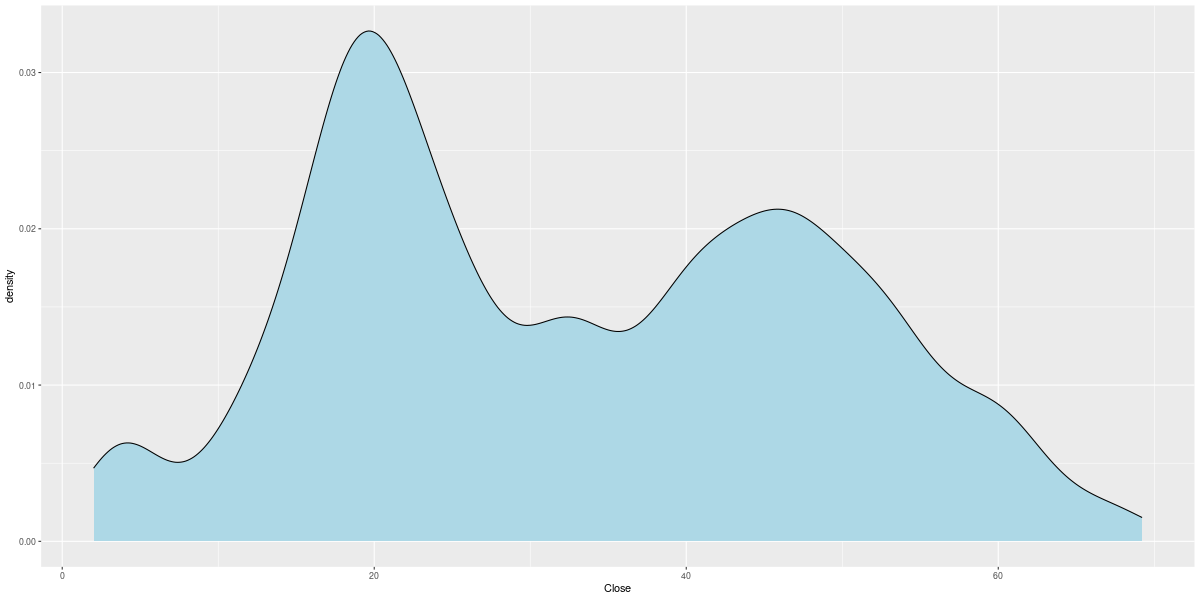

In [ ]:
%%R -w 1200 -h 600
library(patchwork)
ggplot(df,aes(x=Close))+
  geom_density(fill="lightblue")

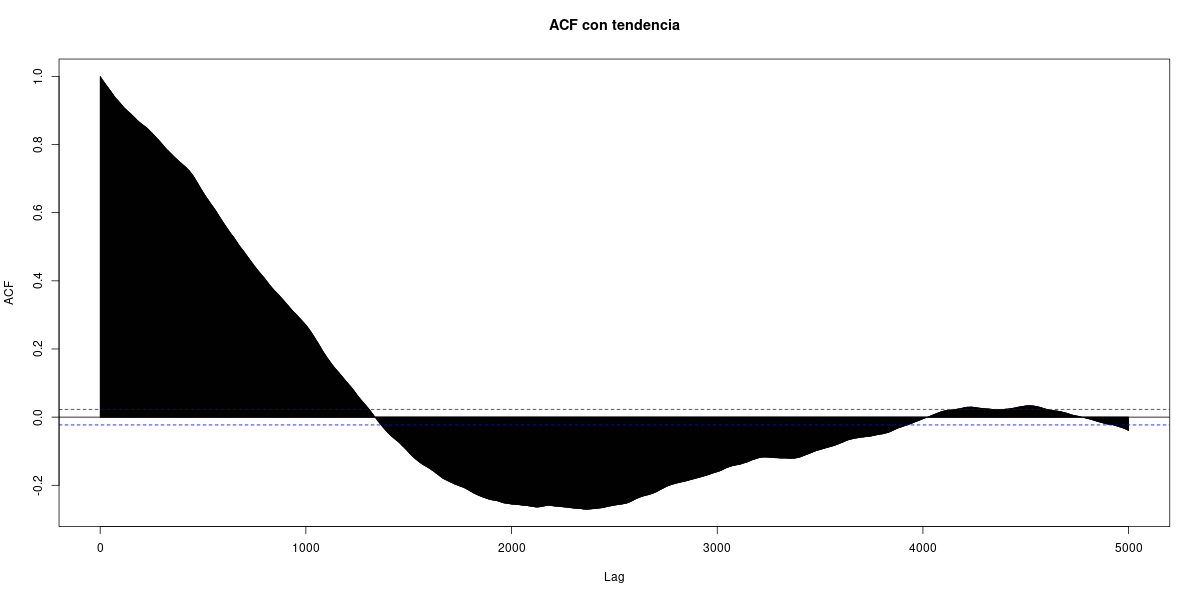

In [ ]:
%%R  -w 1200 -h 600
acf(df$Close, lag.max = 1000, main = "ACF con tendencia")

In [ ]:
%%R 

df

# A tsibble: 7,303 x 2 [1D]


   Date       Close
   <date>     <dbl>
 1 2000-01-03  21.9
 2 2000-01-04  20.9
 3 2000-01-05  21.1
 4 2000-01-06  21.2
 5 2000-01-07  21.4
 6 2000-01-08  21.4
 7 2000-01-09  21.4
 8 2000-01-10  21.4
 9 2000-01-11  21.4
10 2000-01-12  21.4
# ℹ 7,293 more rows
# ℹ Use `print(n = ...)` to see more rows


# 1

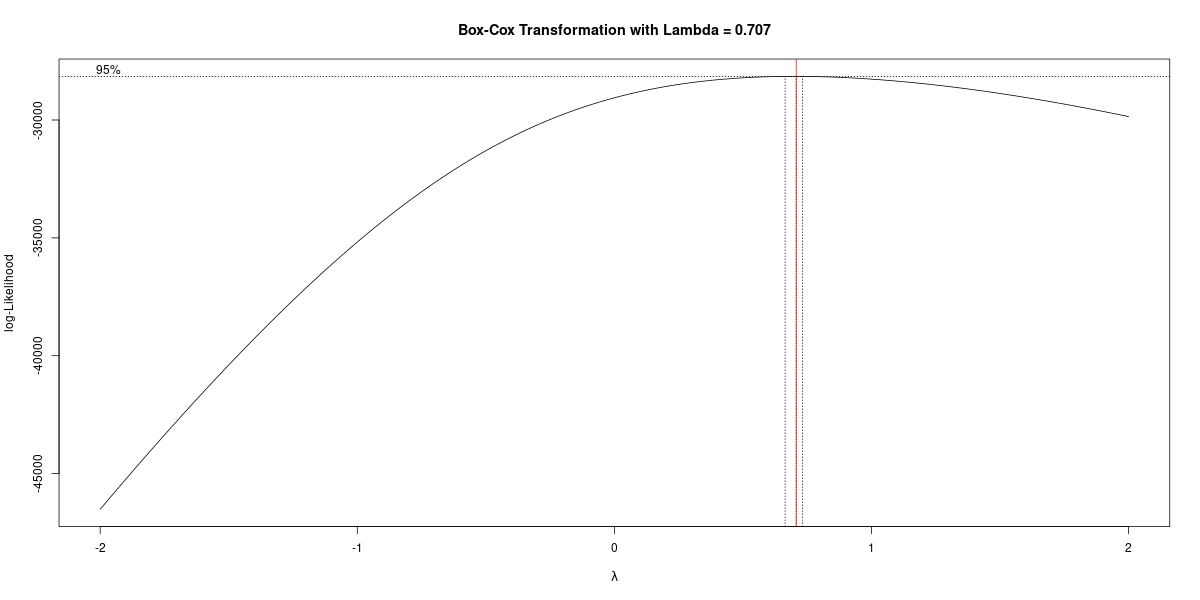

In [104]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

In [105]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.6993769909833747


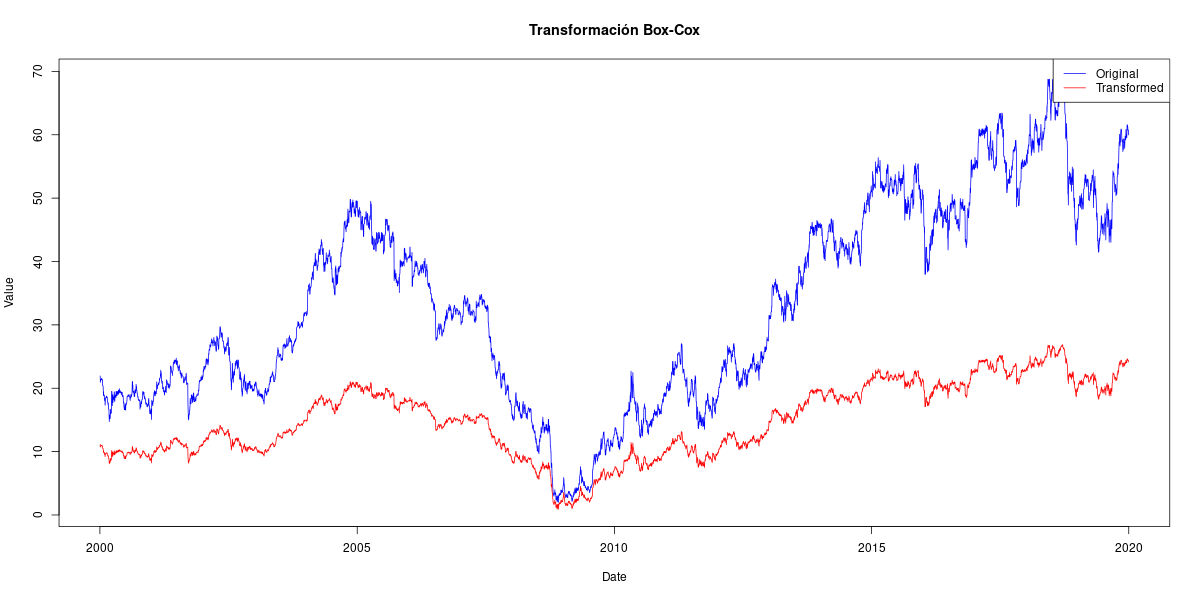

In [106]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

In [107]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Sin Tendencia"))
      

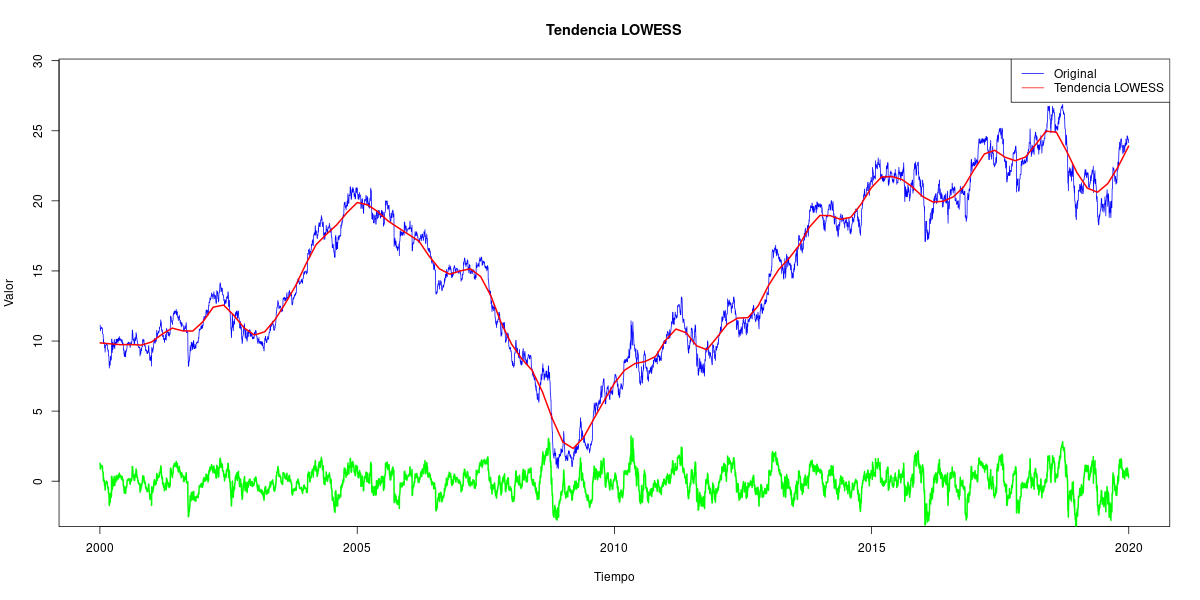

In [108]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)


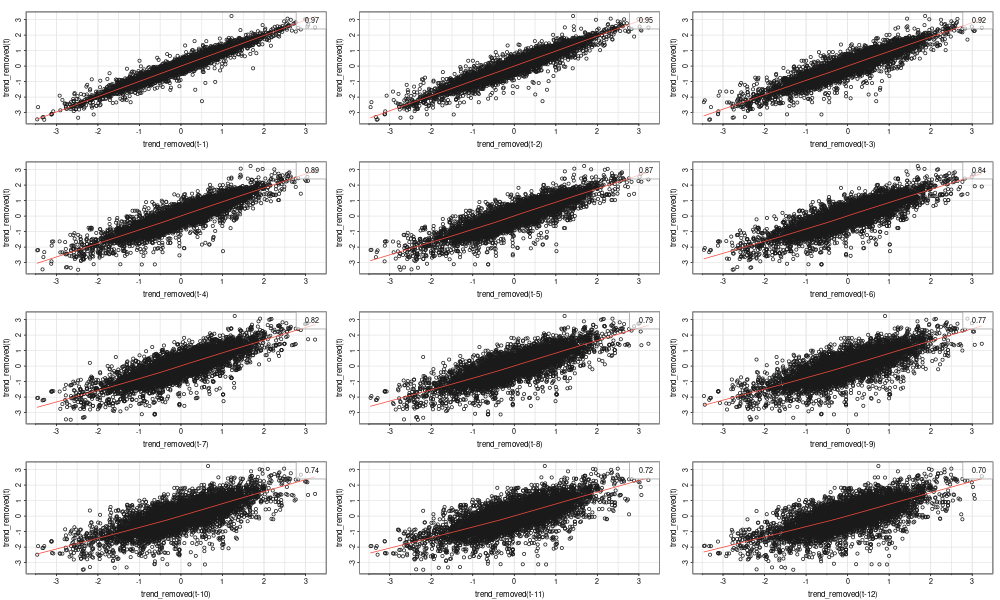

In [109]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

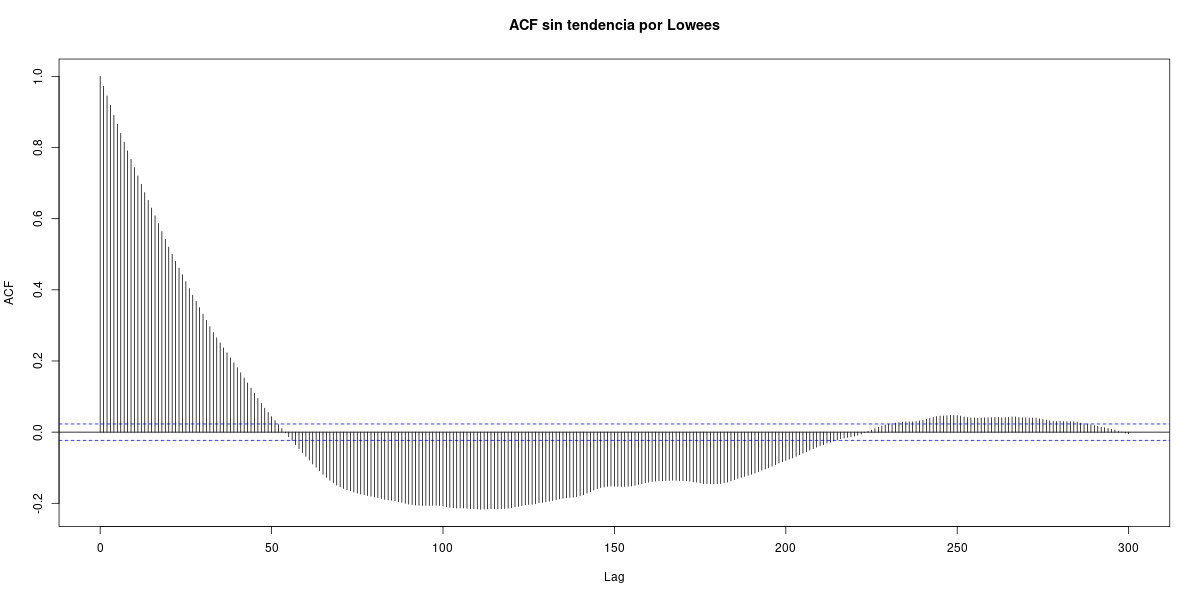

In [110]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 1000, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.35068466 1.39452969 1.10878119 0.92783579 0.80608919 0.71518025
 [7] 0.63960155 0.57906538 0.52789415 0.48238975 0.44227257 0.40754224
[13] 0.37525689 0.35270094 0.32864273 0.30774667 0.28662956 0.26492009
[19] 0.24670520 0.23099600 0.21695072 0.20498385 0.19206384 0.18086044
[25] 0.16821513 0.15954610 0.14974459 0.14461551 0.13791288 0.12313380
[31] 0.11718149 0.11495298 0.10738068 0.10322061 0.10032404 0.10228427
[37] 0.09446188 0.08936879 0.08496173 0.08030332 0.07774972 0.08103933
[43] 0.08147466 0.07778018 0.07294010 0.07320211 0.07349952 0.07496525
[49] 0.07656032 0.07785515 0.07602398

$units
[1] "Nats"

$n.partitions
[1] 19

attr(,"class")
[1] "mutualInf"


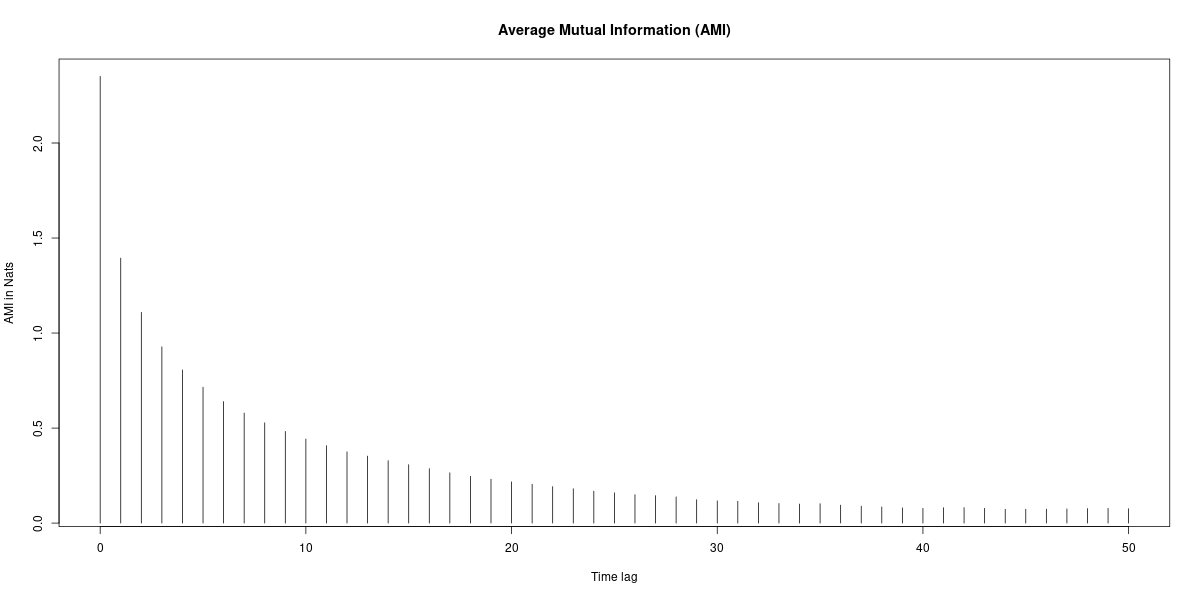

In [111]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [112]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [113]:
%R -i Close_diff

In [114]:
%%R

Close_diff <- na.omit(Close_diff)

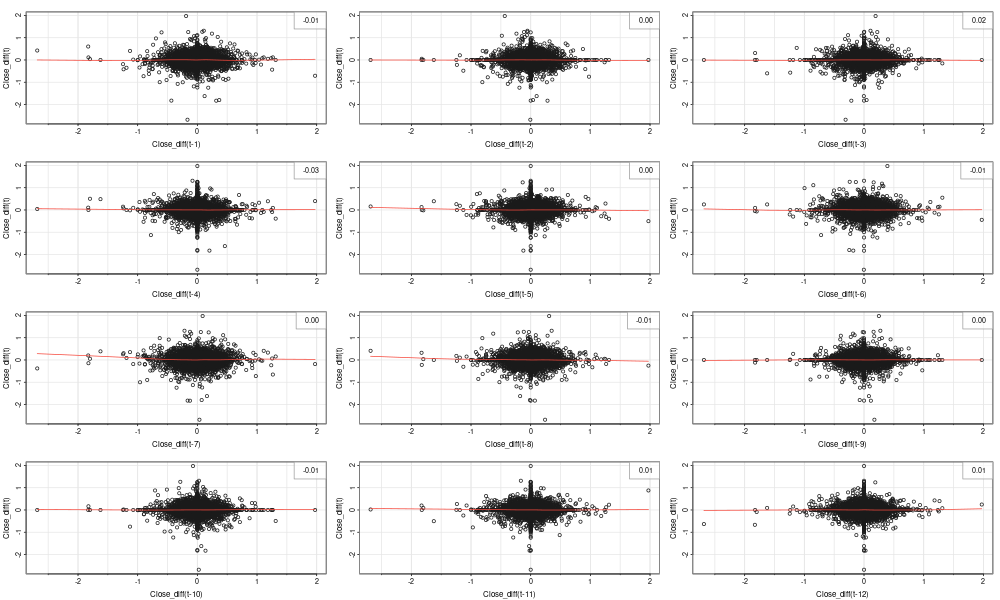

In [115]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

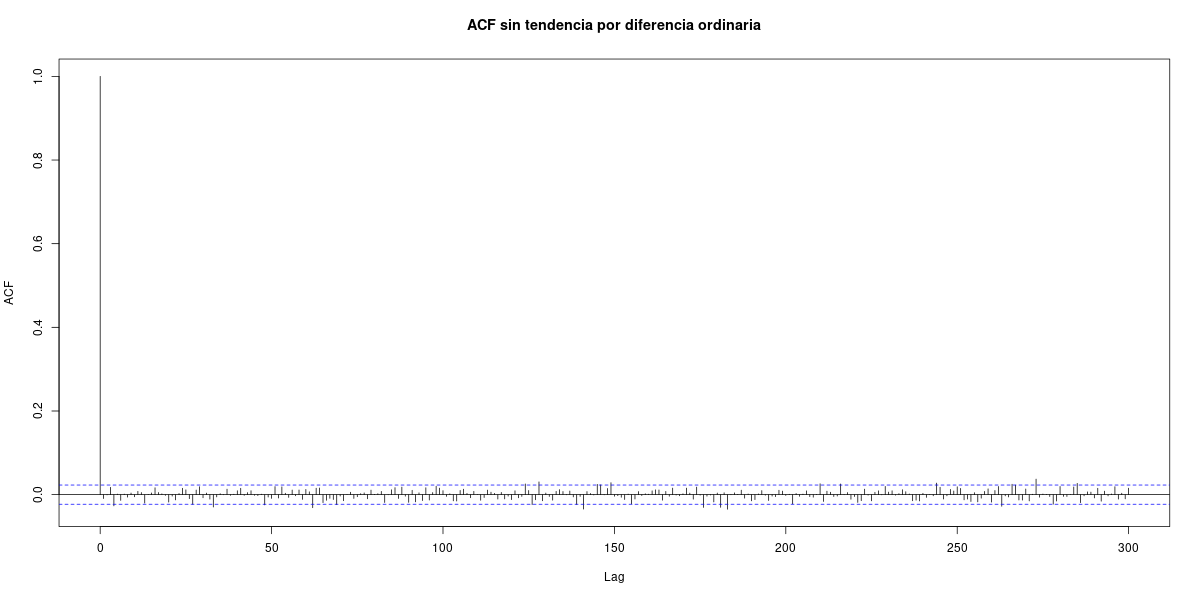

In [116]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 1000, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 1.18994321 0.01628437 0.01481323 0.01669419 0.01852176 0.01397589
 [7] 0.01688785 0.05982252 0.01303641 0.01515133 0.01570021 0.01799971
[13] 0.01173694 0.01590974 0.05668676 0.01532853 0.01281774 0.01604961
[19] 0.01590023 0.01269108 0.01466739 0.05466247 0.01484107 0.01207119
[25] 0.01843839 0.01671610 0.01244381 0.01377579 0.05317332 0.01247124
[31] 0.01449079 0.01573890 0.01963743 0.01564508 0.01585066 0.06228554
[37] 0.01537028 0.01288667 0.01797468 0.01670252 0.01505163 0.01489854
[43] 0.05793651 0.01657565 0.01559653 0.01521531 0.01716784 0.01361612
[49] 0.01447613 0.05399680 0.01372874

$units
[1] "Nats"

$n.partitions
[1] 19

attr(,"class")
[1] "mutualInf"


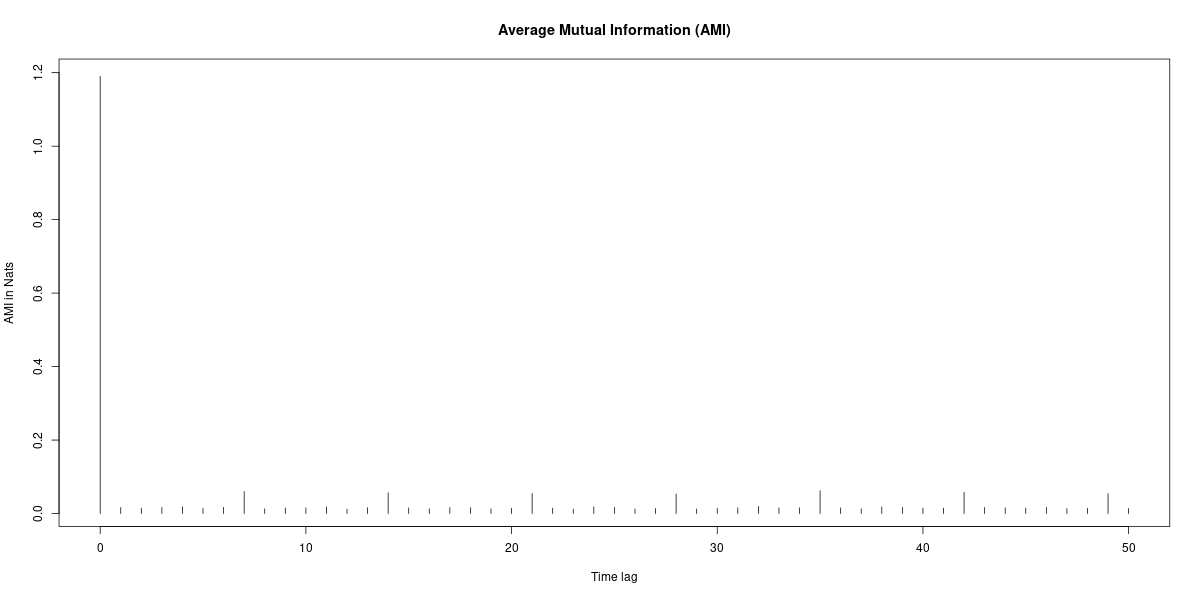

In [117]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3

In [118]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)
df_completo['Day_Name'] = df_completo['Date'].dt.day_name()
df_completo

Date      Close  BoxCox_Close  Trend_Removed   Day_Name
0    2000-01-03  21.937500     10.966228       1.247110     Monday
1    2000-01-04  20.937500     10.568273       0.850281    Tuesday
2    2000-01-05  21.062500     10.618325       0.901449  Wednesday
3    2000-01-06  21.250000     10.693236       0.977466   Thursday
4    2000-01-07  21.375000     10.743066       1.028392     Friday
...         ...        ...           ...            ...        ...
7298 2019-12-27  60.779999     23.852064       0.559016     Friday
7299 2019-12-28  60.779999     23.852064       0.538335   Saturday
7300 2019-12-29  60.779999     23.852064       0.517618     Sunday
7301 2019-12-30  60.110001     23.656829       0.301630     Monday
7302 2019-12-31  59.980000     23.618872       0.242882    Tuesday

[7303 rows x 5 columns]

In [119]:
import plotly.express as px


# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Day_Name', y='Trend_Removed', title='Box Plot de trend_removed por Día de la Semana', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Día de la Semana', title_x=0.5)
fig.show()

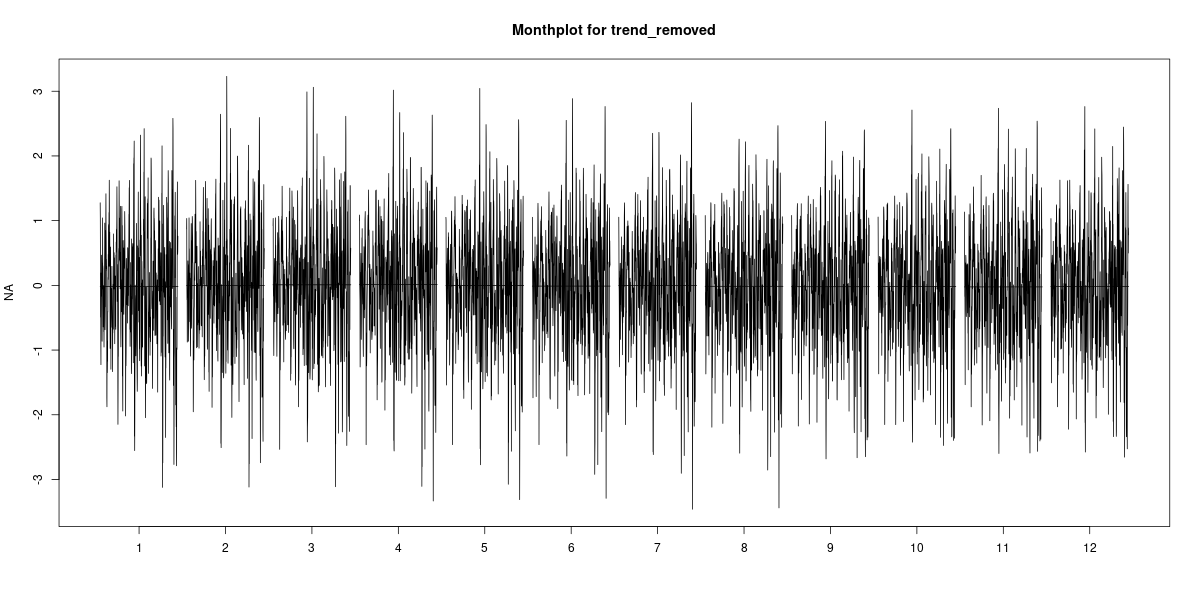

In [120]:
%%R -w 1200 -h 600
# Convert the Date column to Date class if it is not already
monthplot(trend_removed, main = 'Monthplot for trend_removed')

In [121]:
# Extraer el mes de la fecha
df_completo['Month'] = df_completo['Date'].dt.month_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Month', y='Trend_Removed', title='Box Plot de trend_removed por Mes', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Mes', title_x=0.5)
fig.show()

In [122]:


# Extraer el año de la fecha
df_completo['Year'] = df_completo['Date'].dt.year

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Year', y='Trend_Removed', title='Box Plot de trend_removed por Año', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Año', title_x=0.5)
fig.show()


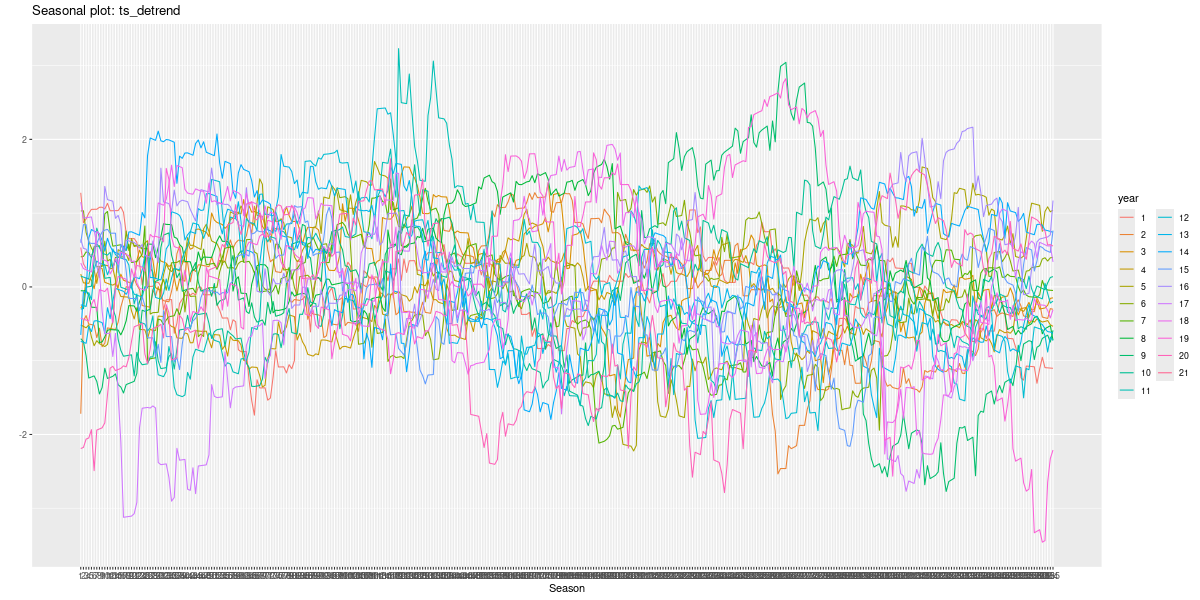

In [123]:
%%R -w 1200 -h 600

library(forecast)
ts_detrend <- ts(trend_removed, frequency = 365.25)
ggseasonplot(ts_detrend)

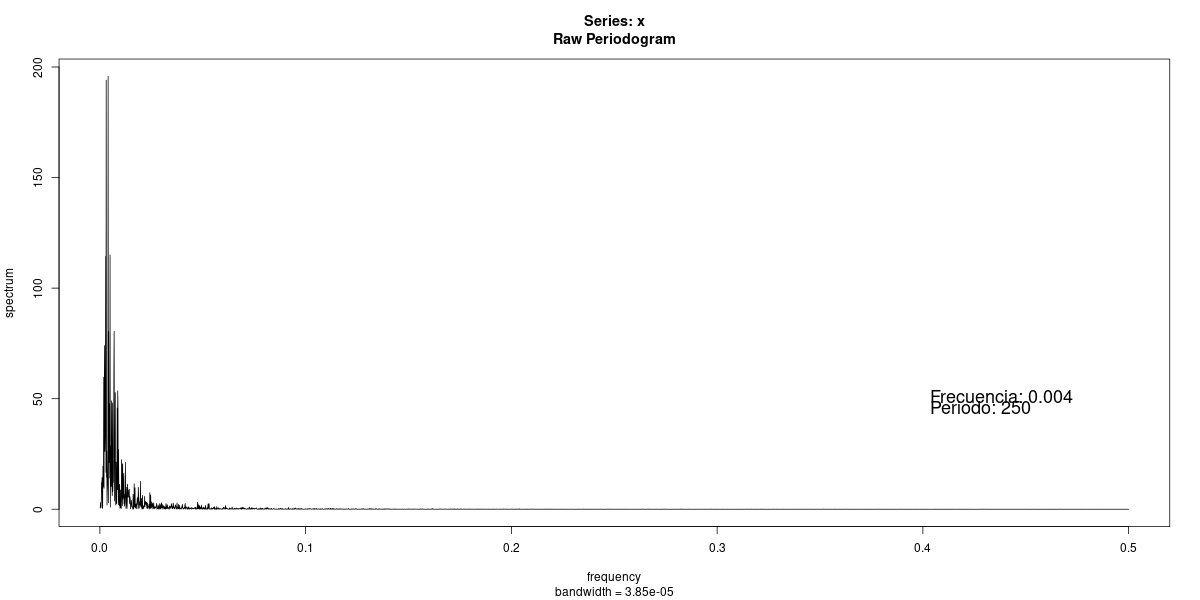

In [124]:
%%R -w 1200 -h 600

# Calculate the periodogram for data2
Periogram <- spectrum(as.numeric(trend_removed), log = 'no')

# Get the index where the periodogram maximizes
ubicacion <- which.max(Periogram$spec)

# Get the frequency value at the index where the periodogram maximizes
max_freq <- Periogram$freq[ubicacion]

# Calculate the corresponding period
max_period <- 1 / max_freq

# Plot the periodogram for data2

# Add text annotation for frequency and period
text(.4, 50, sprintf("Frecuencia: %s", round(max_freq, 5)), pos = 4, cex = 1.5)
text(.4, 45, sprintf("Periodo: %s", round(max_period, 2)), pos = 4, cex = 1.5)

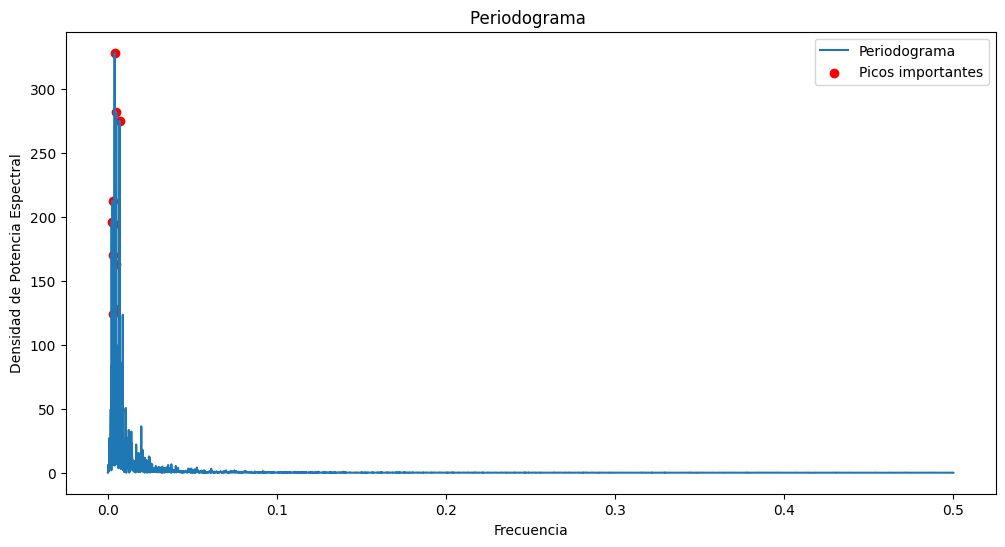

Los 10 Picos mas grandes para el periodograma son:


0           1           2  \
Frecuencia                        0.003971    0.004929    0.006847   
Periodo                         251.827586  202.861111  146.060000   
Densidad de Potencia Espectral  327.967699  281.707643  274.913505   

                                         3           4           5  \
Frecuencia                        0.002739    0.002191    0.003834   
Periodo                         365.150000  456.437500  260.821429   
Densidad de Potencia Espectral  212.327845  196.096188  194.001660   

                                         6           7           8           9  
Frecuencia                        0.003012    0.004656    0.004382    0.003149  
Periodo                         331.954545  214.794118  228.218750  317.521739  
Densidad de Potencia Espectral  169.939520  162.818006  128.172274  123.833448

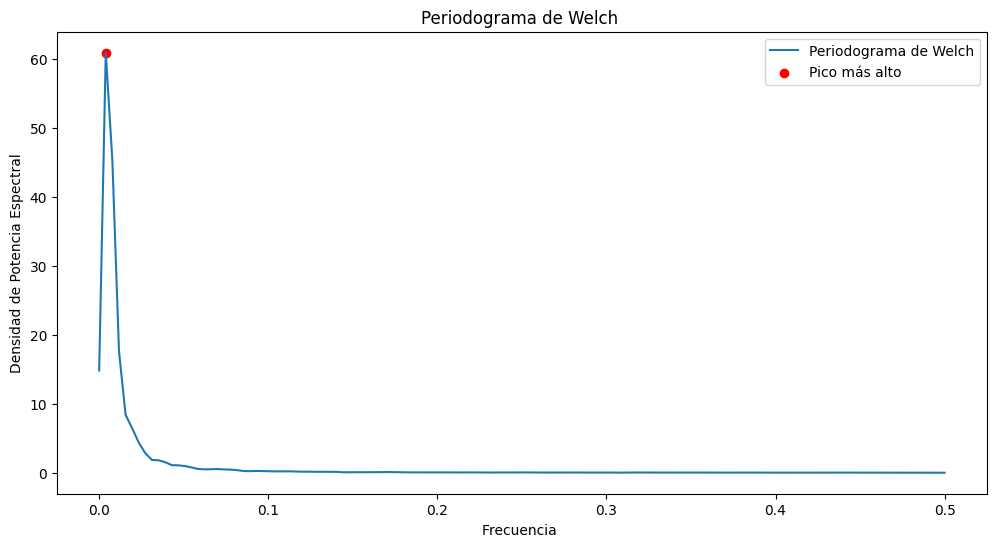

El pico más notorio se da: 
 - Frecuencia: 0.00390625  
                                    
 - Periodo: 256.0 
                                    
 - Densidad de Potencia Espectral: 60.900219742621424


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import heapq


# Calcular el periodograma
f, Pxx_den = signal.periodogram(trend_removed)

# Encontrar los picos más importantes
peaks_indices = heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__)
f_freq = f[peaks_indices]
densidad = Pxx_den[peaks_indices]
f_period = 1 / f[peaks_indices]

# Calcular el periodograma de Welch
f_welch, Pxx_den_welch = signal.welch(trend_removed)

# Encontrar el pico más alto del periodograma de Welch
max_index_value_welch = np.argmax(Pxx_den_welch)
frecuencia_max_welch = f_welch[max_index_value_welch]
frecuencia_pico_welch = 1 / frecuencia_max_welch




# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx_den, label='Periodograma')
plt.scatter(f[peaks_indices], Pxx_den[peaks_indices], color='red', label='Picos importantes')

plt.xlabel('Frecuencia')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma ')
plt.legend()
plt.show()

print('Los 10 Picos mas grandes para el periodograma son:')

# Crear DataFrame con las frecuencias y los periodos
data = {'Frecuencia': f_freq, 'Periodo': f_period, 'Densidad de Potencia Espectral': densidad}
df_frecuencias_periodos = pd.DataFrame(data).sort_values(by='Densidad de Potencia Espectral', ascending=False)

# Mostrar el DataFrame
display(df_frecuencias_periodos.T)

# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.plot(f_welch, Pxx_den_welch, label='Periodograma de Welch')
plt.scatter(frecuencia_max_welch, Pxx_den_welch[max_index_value_welch], color='red', label='Pico más alto')

plt.xlabel('Frecuencia ')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma de Welch ')
plt.legend()
plt.show()

print(f"""El pico más notorio se da: \n - Frecuencia: {frecuencia_max_welch}  
                                    \n - Periodo: {frecuencia_pico_welch} 
                                    \n - Densidad de Potencia Espectral: {Pxx_den_welch[max_index_value_welch]}""")

# 4. Modelado 


## 4.1 Definición Train y Test

In [126]:

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import timedelta
import tensorflow.keras as keras


train_weight = 0.8
split = int(len(df_completo) * train_weight)
df_seg = df_completo[['Date', 'Close']].copy()
display(df_seg.head())
df_seg.index = pd.to_datetime(df_seg['Date'])
df_seg.drop(columns=['Date'], inplace=True)
df_train = df_seg['Close'].iloc[:split]
df_test = df_seg['Close'].iloc[split:]
df_seg

Date    Close
0 2000-01-03  21.9375
1 2000-01-04  20.9375
2 2000-01-05  21.0625
3 2000-01-06  21.2500
4 2000-01-07  21.3750

Close
Date                 
2000-01-03  21.937500
2000-01-04  20.937500
2000-01-05  21.062500
2000-01-06  21.250000
2000-01-07  21.375000
...               ...
2019-12-27  60.779999
2019-12-28  60.779999
2019-12-29  60.779999
2019-12-30  60.110001
2019-12-31  59.980000

[7303 rows x 1 columns]

In [127]:

# Scaling

mu = float(df_train.mean())
sigma = float(df_train.std())

stdize_input = lambda x: (x - mu) / sigma

df_train = df_train.apply(stdize_input)
df_test = df_test.apply(stdize_input)

In [128]:
def get_lagged_features(df, n_steps, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps: number of lags, i.e., sequence length
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    # Generate lagged features
    for lag in range(n_steps + n_steps_ahead - 1, n_steps_ahead - 1, -1):
        lag_list.append(df.shift(lag))
    
    # Stack lagged features along the third dimension
    lag_array = np.stack([i.values for i in lag_list], axis=-1)
    
    # Drop NaN values resulting from shifting
    lag_array = lag_array[n_steps + n_steps_ahead - 1:]
    
    # Reshape lag_array to add the last dimension
    lag_array = np.expand_dims(lag_array, axis=-1)
    
    return lag_array

In [129]:
n_steps = 1095
n_steps_ahead = 1

x_train = get_lagged_features(df_train, n_steps, n_steps_ahead)
y_train =  df_train.values[n_steps + n_steps_ahead - 1:]
y_train_timestamps = df_train.index[n_steps + n_steps_ahead - 1:]

x_test = get_lagged_features(df_test, n_steps, n_steps_ahead)
y_test =  df_test.values[n_steps + n_steps_ahead - 1:]
y_test_timestamps = df_test.index[n_steps + n_steps_ahead - 1:]


print([tensor.shape for tensor in (x_train, y_train, x_test, y_test)])

[(4747, 1095, 1), (4747,), (366, 1095, 1), (366,)]


## 4.2 Suavizamiento Exponencial

In [130]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def ets_rolling_forecast(data, window_size, seasonal_periods, trend, seasonal, damped_trend=False, use_boxcox=False, model_type='additive'):
    forecasts = np.zeros(len(data))
    
    for i in range(window_size, len(data)):
        train_window = data[i-window_size:i]
        
        model = ExponentialSmoothing(
            train_window,
            trend=trend,
            seasonal=seasonal,
            seasonal_periods=seasonal_periods,
            damped_trend=damped_trend,
            use_boxcox=use_boxcox
        )
        
        fitted_model = model.fit(optimized=True, use_brute=True)
        forecast = fitted_model.forecast(1)
        forecasts[i] = forecast[0]
    
    return forecasts


In [131]:
from tqdm import tqdm 
# Extract the time series from the tensors
train_series = x_train[:, :, 0].mean(axis=1)
test_series = x_test[:, :, 0].mean(axis=1)

# Set parameters
window_size = 365  # Approximately one trading year
seasonal_periods = 30  # Approximately one trading month
trend = 'add'
seasonal = 'add'

# Define models
models = [
    ('Additive', False),
    ('Additive Damped', True),
    ('Multiplicative', False),
    ('Multiplicative Damped', True)
]

# Dictionary to store results
results = {
    'train_forecasts': {},
    'test_forecasts': {},
    'train_errors': {},
    'test_errors': {},
    'mse': {}
}

# Run forecasts for each model
for model_name, damped in tqdm(models, desc="Processing models"):
    model_type = 'additive' if 'Additive' in model_name else 'multiplicative'
    
    # Train forecasts
    results['train_forecasts'][model_name] = ets_rolling_forecast(
        train_series, window_size, seasonal_periods, trend, seasonal, 
        damped_trend=damped, model_type=model_type
    )
    
    # Test forecasts
    results['test_forecasts'][model_name] = ets_rolling_forecast(
        test_series, window_size, seasonal_periods, trend, seasonal, 
        damped_trend=damped, model_type=model_type
    )
    
    # Calculate errors
    results['train_errors'][model_name] = y_train[window_size:] - results['train_forecasts'][model_name][window_size:]
    results['test_errors'][model_name] = y_test[window_size:] - results['test_forecasts'][model_name][window_size:]
    
    # Calculate MSE
    results['mse'][f'{model_name} (Train)'] = np.mean(results['train_errors'][model_name]**2)
    results['mse'][f'{model_name} (Test)'] = np.mean(results['test_errors'][model_name]**2)

# Create DataFrame with results
df_results_ETS = pd.DataFrame([
    {'Family': 'ETS', 'Model': model, 'MSE': mse}
    for model, mse in results['mse'].items()
])

print(df_results_ETS)

Processing models:  25%|██▌       | 1/4 [24:37<1:13:52, 1477.47s/it]


KeyboardInterrupt: 

In [ ]:
plot_('Ajuste ETS - Trainning', (y_train_timestamps, y_train, "Train"),
      (y_train_timestamps[window_size:], results['train_forecasts']['Additive'][window_size:], "Additive"),
      (y_train_timestamps[window_size:], results['train_forecasts']['Additive Damped'][window_size:], "Additive Damped"),
      (y_train_timestamps[window_size:], results['train_forecasts']['Multiplicative'][window_size:], "Multiplicative"),
      (y_train_timestamps[window_size:], results['train_forecasts']['Multiplicative Damped'][window_size:], "Multiplicative Damped"))

In [ ]:
plot_('Predicciones ETS - Test', (y_test_timestamps, y_test, "Test"),
      (y_test_timestamps[window_size:], results['test_forecasts']['Additive'][window_size:], "Additive"),
      (y_test_timestamps[window_size:], results['test_forecasts']['Additive Damped'][window_size:], "Additive Damped"),
      (y_test_timestamps[window_size:], results['test_forecasts']['Multiplicative'][window_size:], "Multiplicative"),
      (y_test_timestamps[window_size:], results['test_forecasts']['Multiplicative Damped'][window_size:], "Multiplicative Damped"))

## 4.3. Decision Tree

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, x_test, y_test are already defined
# If not, you'll need to prepare your data accordingly

# Function to create lagged features
def create_lagged_features(data, n_lags):
    return np.column_stack([data[i:len(data)-n_lags+i+1] for i in range(n_lags)])

# Prepare data with lagged features
n_lags = 5  # You can adjust this
X_train = create_lagged_features(x_train[:, :, 0].mean(axis=1), n_lags)
y_train_dt = y_train[n_lags:]
X_test = create_lagged_features(x_test[:, :, 0].mean(axis=1), n_lags)
y_test_dt = y_test[n_lags:]

# Define models
models = [
    ('Max Depth Optimized', {'max_depth': range(1, 21)}),
    ('Alpha Optimized', {'ccp_alpha': np.logspace(-3, 0, 20)})
]

# Dictionary to store results
results = {
    'train_predictions': {},
    'test_predictions': {},
    'train_mse': {},
    'test_mse': {},
    'best_params': {}
}

# Run grid search for each model
for model_name, param_grid in tqdm(models, desc="Processing models"):
    # Create the base model
    dt = DecisionTreeRegressor(random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train_dt)
    
    # Store best parameters
    results['best_params'][model_name] = grid_search.best_params_
    
    # Make predictions
    results['train_predictions'][model_name] = grid_search.predict(X_train)
    results['test_predictions'][model_name] = grid_search.predict(X_test)
    
    # Calculate MSE
    results['train_mse'][model_name] = mean_squared_error(y_train_dt, results['train_predictions'][model_name])
    results['test_mse'][model_name] = mean_squared_error(y_test_dt, results['test_predictions'][model_name])

# Create DataFrame with results
df_results_DT = pd.DataFrame([
    {'Family': 'Decision Tree', 'Model': model, 'MSE (Train)': results['train_mse'][model], 'MSE (Test)': results['test_mse'][model], 'Best Parameters': results['best_params'][model]}
    for model, _ in models
])

print(df_results_DT)



## 4.4 Neural Network

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Input
from keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tcn import TCN

# Assuming x_train, y_train, x_test, y_test are already defined
# If not, you'll need to prepare your data accordingly

# Prepare data
def prepare_data(x, y, n_steps):
    X, Y = [], []
    for i in range(len(x) - n_steps):
        X.append(x[i:i+n_steps])
        Y.append(y[i+n_steps])
    return np.array(X), np.array(Y)

n_steps = 60  # Number of time steps to look back
X_train, y_train_nn = prepare_data(x_train[:, :, 0].mean(axis=1), y_train, n_steps)
X_test, y_test_nn = prepare_data(x_test[:, :, 0].mean(axis=1), y_test, n_steps)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Scale the data
scaler = MinMaxScaler()
y_train_nn = scaler.fit_transform(y_train_nn.reshape(-1, 1))
y_test_nn = scaler.transform(y_test_nn.reshape(-1, 1))

# Define model architectures
def build_mlp(hp):
    model = Sequential()
    model.add(keras.layers.Flatten(input_shape=(n_steps, 1)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

def build_cnn(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 256, step=32),
                     kernel_size=hp.Int('kernel_size', 2, 10),
                     activation='relu',
                     input_shape=(n_steps, 1)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hp.Int('dense_units', 32, 256, step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

def build_tcn(hp):
    input_layer = Input(shape=(n_steps, 1))
    tcn_layer = TCN(nb_filters=hp.Int('nb_filters', 32, 256, step=32),
                    kernel_size=hp.Int('kernel_size', 2, 8),
                    nb_stacks=hp.Int('nb_stacks', 1, 3),
                    dilations=[1, 2, 4, 8],
                    padding='causal',
                    use_skip_connections=True,
                    dropout_rate=hp.Float('dropout_rate', 0, 0.5, step=0.1),
                    return_sequences=False)(input_layer)
    output_layer = Dense(1)(tcn_layer)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

# Define models
models = [
    ('MLP', build_mlp),
    ('CNN', build_cnn),
    ('TCN', build_tcn)
]

# Dictionary to store results
results = {
    'train_predictions': {},
    'test_predictions': {},
    'train_mse': {},
    'test_mse': {},
    'best_params': {}
}

# Run hyperparameter tuning and training for each model
for model_name, model_builder in tqdm(models, desc="Processing models"):
    # Perform hyperparameter tuning
    tuner = RandomSearch(
        model_builder,
        objective='val_loss',
        max_trials=50,
        executions_per_trial=2,
        directory='keras_tuner',
        project_name=f'{model_name}_tuning'
    )
    
    tuner.search(X_train, y_train_nn, epochs=50, validation_split=0.2, verbose=0)
    
    # Get the best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Store best parameters
    results['best_params'][model_name] = tuner.get_best_hyperparameters(num_trials=1)[0].values
    
    # Train the best model
    best_model.fit(X_train, y_train_nn, epochs=100, batch_size=32, verbose=0)
    
    # Make predictions
    results['train_predictions'][model_name] = scaler.inverse_transform(best_model.predict(X_train))
    results['test_predictions'][model_name] = scaler.inverse_transform(best_model.predict(X_test))
    
    # Calculate MSE
    results['train_mse'][model_name] = mean_squared_error(scaler.inverse_transform(y_train_nn), results['train_predictions'][model_name])
    results['test_mse'][model_name] = mean_squared_error(scaler.inverse_transform(y_test_nn), results['test_predictions'][model_name])

# Create DataFrame with results
df_results_NN = pd.DataFrame([
    {'Family': 'Neural Network', 'Model': model, 'MSE (Train)': results['train_mse'][model], 'MSE (Test)': results['test_mse'][model], 'Best Parameters': results['best_params'][model]}
    for model, _ in models
])

print(df_results_NN)



## 4.5. Recurrent Neural Network

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional
from keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, x_test, y_test are already defined
# If not, you'll need to prepare your data accordingly

# Prepare data
def prepare_data(x, y, n_steps):
    X, Y = [], []
    for i in range(len(x) - n_steps):
        X.append(x[i:i+n_steps])
        Y.append(y[i+n_steps])
    return np.array(X), np.array(Y)

n_steps = 60  # Number of time steps to look back
X_train, y_train_nn = prepare_data(x_train[:, :, 0].mean(axis=1), y_train, n_steps)
X_test, y_test_nn = prepare_data(x_test[:, :, 0].mean(axis=1), y_test, n_steps)

# Reshape input data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Scale the data
scaler = MinMaxScaler()
y_train_nn = scaler.fit_transform(y_train_nn.reshape(-1, 1))
y_test_nn = scaler.transform(y_test_nn.reshape(-1, 1))

# Define model architectures
def build_simple_rnn(hp):
    model = Sequential()
    model.add(SimpleRNN(units=hp.Int('rnn_units', 32, 256, step=32),
                        return_sequences=hp.Boolean('return_sequences'),
                        input_shape=(n_steps, 1)))
    if hp.Boolean('bidirectional'):
        model.layers[-1] = Bidirectional(model.layers[-1])
    if hp.Boolean('second_rnn'):
        model.add(SimpleRNN(units=hp.Int('rnn_units_2', 32, 256, step=32)))
        if hp.Boolean('bidirectional_2'):
            model.layers[-1] = Bidirectional(model.layers[-1])
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

def build_lstm(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units', 32, 256, step=32),
                   return_sequences=hp.Boolean('return_sequences'),
                   input_shape=(n_steps, 1)))
    if hp.Boolean('bidirectional'):
        model.layers[-1] = Bidirectional(model.layers[-1])
    if hp.Boolean('second_lstm'):
        model.add(LSTM(units=hp.Int('lstm_units_2', 32, 256, step=32)))
        if hp.Boolean('bidirectional_2'):
            model.layers[-1] = Bidirectional(model.layers[-1])
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

def build_gru(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('gru_units', 32, 256, step=32),
                  return_sequences=hp.Boolean('return_sequences'),
                  input_shape=(n_steps, 1)))
    if hp.Boolean('bidirectional'):
        model.layers[-1] = Bidirectional(model.layers[-1])
    if hp.Boolean('second_gru'):
        model.add(GRU(units=hp.Int('gru_units_2', 32, 256, step=32)))
        if hp.Boolean('bidirectional_2'):
            model.layers[-1] = Bidirectional(model.layers[-1])
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse')
    return model

# Define models
models = [
    ('Simple RNN', build_simple_rnn),
    ('LSTM', build_lstm),
    ('GRU', build_gru)
]

# Dictionary to store results
results = {
    'train_predictions': {},
    'test_predictions': {},
    'train_mse': {},
    'test_mse': {},
    'best_params': {}
}

# Run hyperparameter tuning and training for each model
for model_name, model_builder in tqdm(models, desc="Processing models"):
    # Perform hyperparameter tuning
    tuner = RandomSearch(
        model_builder,
        objective='val_loss',
        max_trials=50,
        executions_per_trial=2,
        directory='keras_tuner',
        project_name=f'{model_name}_tuning'
    )
    
    tuner.search(X_train, y_train_nn, epochs=50, validation_split=0.2, verbose=0)
    
    # Get the best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Store best parameters
    results['best_params'][model_name] = tuner.get_best_hyperparameters(num_trials=1)[0].values
    
    # Train the best model
    best_model.fit(X_train, y_train_nn, epochs=100, batch_size=32, verbose=0)
    
    # Make predictions
    results['train_predictions'][model_name] = scaler.inverse_transform(best_model.predict(X_train))
    results['test_predictions'][model_name] = scaler.inverse_transform(best_model.predict(X_test))
    
    # Calculate MSE
    results['train_mse'][model_name] = mean_squared_error(scaler.inverse_transform(y_train_nn), results['train_predictions'][model_name])
    results['test_mse'][model_name] = mean_squared_error(scaler.inverse_transform(y_test_nn), results['test_predictions'][model_name])

# Create DataFrame with results
df_results_RNN = pd.DataFrame([
    {'Family': 'RNN', 'Model': model, 'MSE (Train)': results['train_mse'][model], 'MSE (Test)': results['test_mse'][model], 'Best Parameters': results['best_params'][model]}
    for model, _ in models
])

print(df_results_RNN)

